# Neural Networks for Pima Indian dataset

## Import packages

In [1]:
import pandas as pd
import os
import data
from model import MLP
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
#TensorFlow version
print(tf.__version__)

1.5.0


## Data Processing

Retrieve imputed train and test sets 

In [3]:
currentPath = os.getcwd()
test_list = data.testImputed(currentPath=currentPath)
train = data.trainImputed(currentPath=currentPath)

Split Outcome into two columns instead of 1: Diabetic and Not_Diabetic

In [4]:
#For train
train["Not Diabetic"] = (train["Outcome"] == 0).astype(int)
train.rename(columns={"Outcome": "Diabetic"}, inplace=True)

#For test
for i in range(len(test_list)):
    test_list[i]["Not Diabetic"] = (test_list[i]["Outcome"] == 0).astype(int)
    test_list[i].rename(columns={"Outcome": "Diabetic"}, inplace=True)

Split into target and features.

In [7]:
X_train = train.as_matrix()[:,0:-2]
y_train = train.as_matrix()[:, -2:]
test_split_list = list()

#First element is X, second element is y
for i in range(len(test_list)):
    test_split_list.append( [ test_list[i].as_matrix()[:,0:-2],
                         test_list[i].as_matrix()[:,-2:] ] )


Scale the features.

In [8]:
X_test = test_split_list[0][0]
y_test = test_split_list[0][1]
scale_X = StandardScaler()
scale_X.fit(X_train)
X_train_scaled = scale_X.transform(X_train)
X_test_scaled = scale_X.transform(X_test)

## Initiate and train a Multi-layer Perceptron

In [43]:
import model
reload(model)
from model import MLP

In [20]:
inputDim = X_train_scaled.shape[1]
outputDim = y_train.shape[1]
mlp = MLP()
mlp.buildModel(neurons=[10,10,10,10], activations=["relu", "relu", "relu", "relu"], 
               dropout=[0.5,0.5,0.5,0.5], inputDim=inputDim, outputDim=outputDim)

Epoch 1 : Training loss: 0.694314301014, 
 test accuracy : 0.342857152224

Epoch 11 : Training loss: 0.692826628685, 
 test accuracy : 0.657142877579

Epoch 21 : Training loss: 0.690799951553, 
 test accuracy : 0.657142877579

Epoch 31 : Training loss: 0.690326809883, 
 test accuracy : 0.657142877579

Epoch 41 : Training loss: 0.688141107559, 
 test accuracy : 0.657142877579

Epoch 51 : Training loss: 0.686038613319, 
 test accuracy : 0.657142877579

Epoch 61 : Training loss: 0.684974908829, 
 test accuracy : 0.657142877579

Epoch 71 : Training loss: 0.684505045414, 
 test accuracy : 0.657142877579

Epoch 81 : Training loss: 0.683964371681, 
 test accuracy : 0.657142877579

Epoch 91 : Training loss: 0.68582701683, 
 test accuracy : 0.657142877579

Epoch 101 : Training loss: 0.685524642467, 
 test accuracy : 0.657142877579

Epoch 111 : Training loss: 0.673711836338, 
 test accuracy : 0.657142877579

Epoch 121 : Training loss: 0.676564574242, 
 test accuracy : 0.657142877579

Epoch 131 :

Epoch 1071 : Training loss: 0.547445714474, 
 test accuracy : 0.800000011921

Epoch 1081 : Training loss: 0.59648501873, 
 test accuracy : 0.785714268684

Epoch 1091 : Training loss: 0.582020163536, 
 test accuracy : 0.800000011921

Epoch 1101 : Training loss: 0.549617111683, 
 test accuracy : 0.785714268684

Epoch 1111 : Training loss: 0.510920166969, 
 test accuracy : 0.800000011921

Epoch 1121 : Training loss: 0.516544699669, 
 test accuracy : 0.785714268684

Epoch 1131 : Training loss: 0.525967955589, 
 test accuracy : 0.785714268684

Epoch 1141 : Training loss: 0.524755418301, 
 test accuracy : 0.785714268684

Epoch 1151 : Training loss: 0.561574876308, 
 test accuracy : 0.785714268684

Epoch 1161 : Training loss: 0.620010137558, 
 test accuracy : 0.800000011921

Epoch 1171 : Training loss: 0.526211738586, 
 test accuracy : 0.800000011921

Epoch 1181 : Training loss: 0.45645159483, 
 test accuracy : 0.800000011921

Epoch 1191 : Training loss: 0.630298793316, 
 test accuracy : 0.80

Epoch 2131 : Training loss: 0.479418754578, 
 test accuracy : 0.800000011921

Epoch 2141 : Training loss: 0.490226566792, 
 test accuracy : 0.800000011921

Epoch 2151 : Training loss: 0.553202211857, 
 test accuracy : 0.800000011921

Epoch 2161 : Training loss: 0.534338474274, 
 test accuracy : 0.800000011921

Epoch 2171 : Training loss: 0.556118071079, 
 test accuracy : 0.800000011921

Epoch 2181 : Training loss: 0.518820166588, 
 test accuracy : 0.800000011921

Epoch 2191 : Training loss: 0.54202234745, 
 test accuracy : 0.800000011921

Epoch 2201 : Training loss: 0.57056504488, 
 test accuracy : 0.800000011921

Epoch 2211 : Training loss: 0.551253914833, 
 test accuracy : 0.800000011921

Epoch 2221 : Training loss: 0.486887723207, 
 test accuracy : 0.800000011921

Epoch 2231 : Training loss: 0.613197922707, 
 test accuracy : 0.800000011921

Epoch 2241 : Training loss: 0.511562526226, 
 test accuracy : 0.800000011921

Epoch 2251 : Training loss: 0.519060254097, 
 test accuracy : 0.81

Epoch 3201 : Training loss: 0.501706898212, 
 test accuracy : 0.785714268684

Epoch 3211 : Training loss: 0.550597906113, 
 test accuracy : 0.785714268684

Epoch 3221 : Training loss: 0.470423609018, 
 test accuracy : 0.785714268684

Epoch 3231 : Training loss: 0.507527410984, 
 test accuracy : 0.785714268684

Epoch 3241 : Training loss: 0.550493299961, 
 test accuracy : 0.814285695553

Epoch 3251 : Training loss: 0.455105006695, 
 test accuracy : 0.814285695553

Epoch 3261 : Training loss: 0.43584176898, 
 test accuracy : 0.800000011921

Epoch 3271 : Training loss: 0.452228456736, 
 test accuracy : 0.814285695553

Epoch 3281 : Training loss: 0.469605654478, 
 test accuracy : 0.814285695553

Epoch 3291 : Training loss: 0.525693833828, 
 test accuracy : 0.814285695553

Epoch 3301 : Training loss: 0.547101974487, 
 test accuracy : 0.814285695553

Epoch 3311 : Training loss: 0.485591113567, 
 test accuracy : 0.814285695553

Epoch 3321 : Training loss: 0.513615727425, 
 test accuracy : 0.8

Epoch 4271 : Training loss: 0.554853856564, 
 test accuracy : 0.785714268684

Epoch 4281 : Training loss: 0.454265773296, 
 test accuracy : 0.785714268684

Epoch 4291 : Training loss: 0.518540024757, 
 test accuracy : 0.785714268684

Epoch 4301 : Training loss: 0.498376190662, 
 test accuracy : 0.785714268684

Epoch 4311 : Training loss: 0.492559671402, 
 test accuracy : 0.785714268684

Epoch 4321 : Training loss: 0.461686879396, 
 test accuracy : 0.785714268684

Epoch 4331 : Training loss: 0.515039682388, 
 test accuracy : 0.785714268684

Epoch 4341 : Training loss: 0.513954818249, 
 test accuracy : 0.785714268684

Epoch 4351 : Training loss: 0.516654789448, 
 test accuracy : 0.785714268684

Epoch 4361 : Training loss: 0.557469069958, 
 test accuracy : 0.785714268684

Epoch 4371 : Training loss: 0.617254078388, 
 test accuracy : 0.785714268684

Epoch 4381 : Training loss: 0.470565140247, 
 test accuracy : 0.785714268684

Epoch 4391 : Training loss: 0.558257699013, 
 test accuracy : 0.

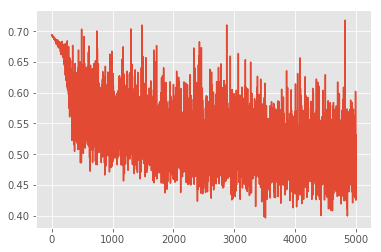

In [21]:
%matplotlib inline
mlp.train(X=X_train_scaled, y=y_train, X_test=X_test_scaled, y_test=y_test, num_epochs=5000, lr=0.0001)

In [11]:
results_list = mlp.predict(X=scale_X.transform(test_split_list[0][0]))

In [15]:
print(a[:,0] == test_split_list[0][1][:,0]).sum()/70.0

0.7857142857142857
